# DECISION TREE

#### Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


## 1. Data Preparation:

#### Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [1]:
#import pandas library
import pandas as pd
import numpy as np

In [2]:
#Load the Excel file
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


## 2. Exploratory Data Analysis (EDA):

#### Perform exploratory data analysis to understand the structure of the dataset.

In [3]:
#Find the shape of the dataset
df.shape

(908, 13)

In [4]:
#Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
#Get the dataset summary
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


#### Check for missing values, outliers, and inconsistencies in the data.

In [6]:
#Check for duplicates
df.duplicated().sum()
df[df.duplicated]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [7]:
#drop the duplicate rows
df.drop_duplicates(inplace=True,ignore_index=True)
df.duplicated().sum()

np.int64(0)

In [8]:
#Check for null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [9]:
# Calculate % of null values per column
null_percentage = df.isnull().mean() * 100
null_percentage 

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalch      0.000000
exang       0.000000
oldpeak     6.835722
slope       0.000000
thal        0.000000
num         0.000000
dtype: float64

In [10]:
#Fill mean value inplace of null values
df.fillna({'oldpeak': df['oldpeak'].mean()}, inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [11]:
# split numerical and categorical data
#Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns
#Select categorical columns
cat_cols = df.select_dtypes(include=['object','bool']).columns

In [12]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

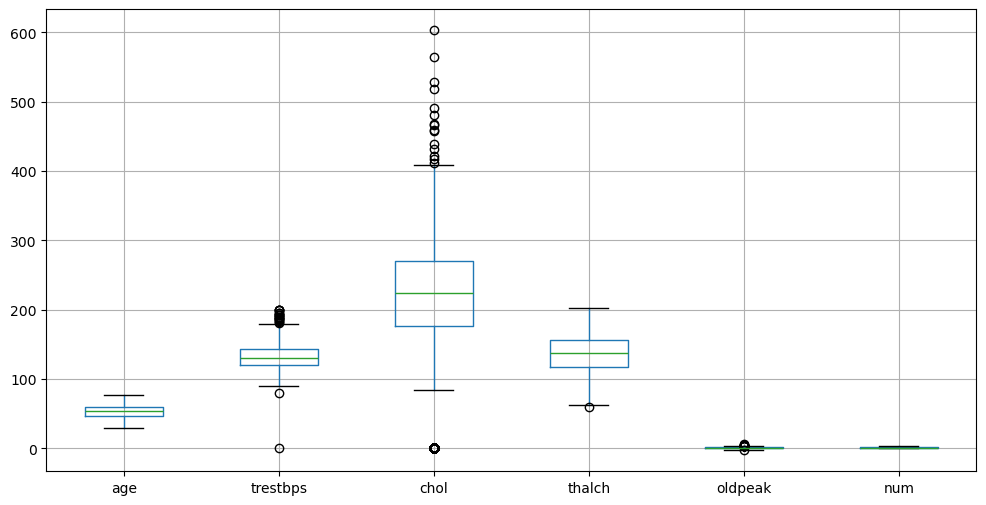

In [13]:
#Check for outliers
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()

In [14]:
#Outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

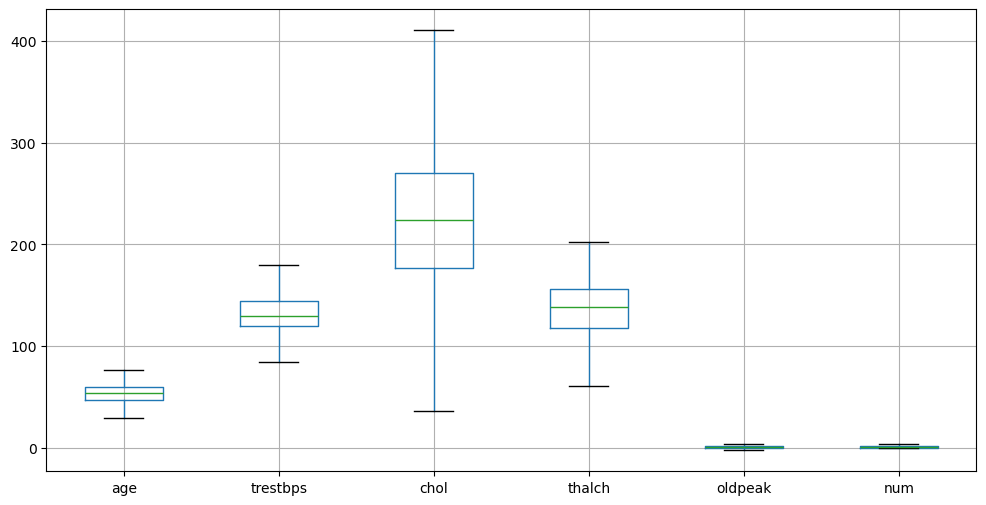

In [15]:
#Check for outliers
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()

#### Visualize the distribution of features, including histograms, box plots, and correlation matrices.

##### Histogram

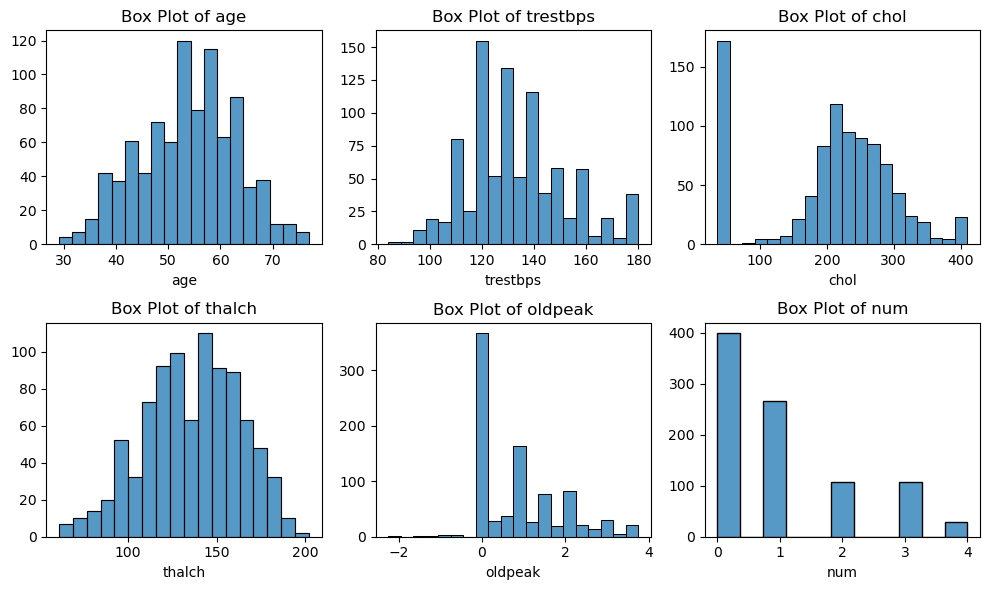

In [16]:
#Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create histogram for all numerical columns
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

##### Boxplot

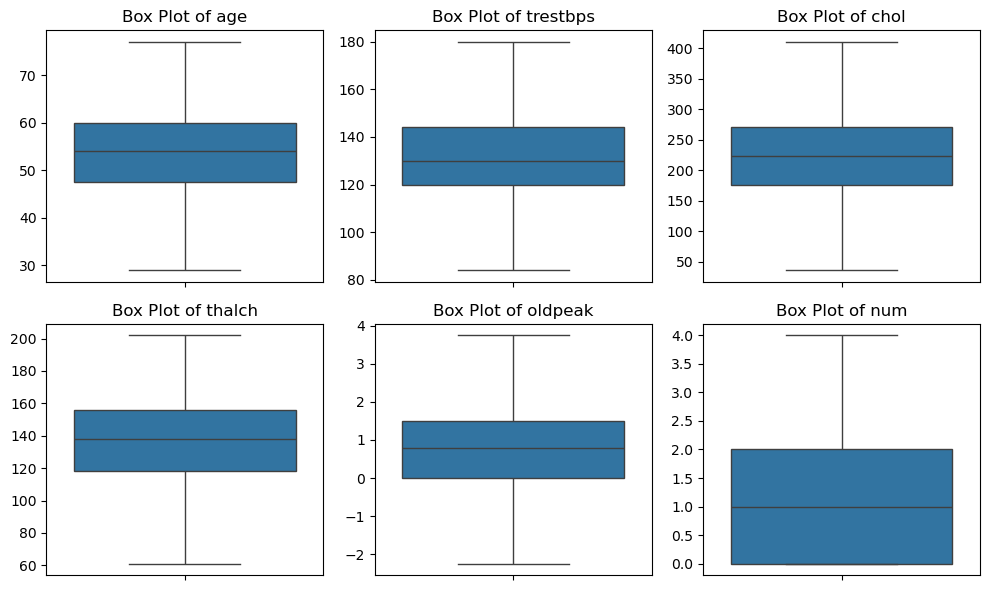

In [18]:
##Get the number of numeric columns 
plt.figure(figsize=(10, 6))
num_plots = len(numeric_columns)
num_rows = (num_plots + 2) // 3 # Adjust rows based on number of plots

#Create boxplot for all numerical columns
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') 
plt.tight_layout()
plt.show()

##### Correlation matrics

In [19]:
#Correlation metrics
corr=df[num_cols].corr()
corr

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.261741,-0.092618,-0.327919,0.236688,0.326227
trestbps,0.261741,1.000000,0.126318,-0.131224,0.159684,0.141934
chol,-0.092618,0.126318,1.000000,0.194884,0.030639,-0.228771
thalch,-0.327919,-0.131224,0.194884,1.000000,-0.132746,-0.322633
oldpeak,0.236688,0.159684,0.030639,-0.132746,1.000000,0.418080
num,0.326227,0.141934,-0.228771,-0.322633,0.418080,1.000000


##### Heatmap

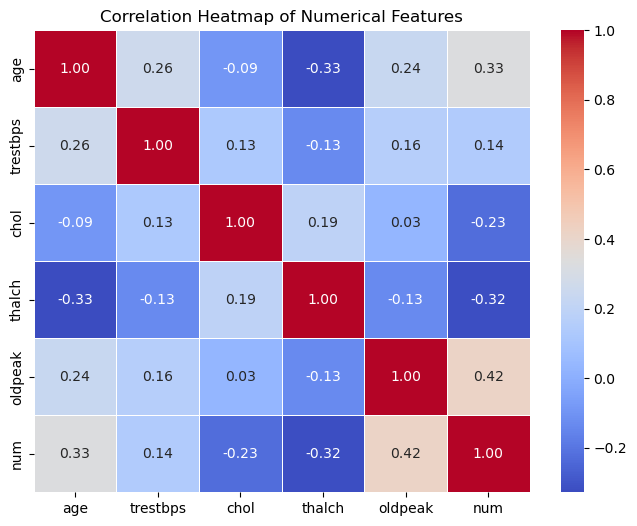

In [20]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 3. Feature Engineering:


### If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


##### encoding categorical variables

In [21]:
# Map Male as 1 and Female as 0
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140.0,192.0,False,normal,148.0,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110.0,201.0,False,normal,126.0,True,1.5,flat,fixed defect,0


In [22]:
#List the categorical columns for encode
categorical_cols_to_encode = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Exclude 'sex' as it's already mapped 
if 'sex' in categorical_cols_to_encode:
    categorical_cols_to_encode.remove('sex')

#Aplly On-Hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
df_encoded.head()

,age,sex,trestbps,chol,thalch,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,150.0,2.3,0,False,False,True,True,False,False,False,False,False,False,False,False,False
1,41,1,135.0,203.0,132.0,0.0,0,True,False,False,False,True,False,False,False,False,True,False,False,False
2,57,1,140.0,192.0,148.0,0.4,0,False,False,False,False,True,False,False,False,False,True,False,False,False
3,52,1,118.0,186.0,190.0,0.0,0,False,False,True,False,False,False,False,False,False,True,False,False,False
4,57,1,110.0,201.0,126.0,1.5,0,False,False,False,False,True,False,True,False,False,True,False,False,False


##### scaling numerical features

In [23]:
#import standard scalar
from sklearn.preprocessing import StandardScaler

In [24]:
#split target and features
target=df_encoded['num']
features=df_encoded.drop(columns='num')

In [25]:
#List the numerical columns for encode
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])
features.head()

,age,sex,trestbps,chol,thalch,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006097,0.514775,0.608289,0.265386,0.523305,1.389870,False,False,True,True,False,False,False,False,False,False,False,False,False
1,-1.396447,0.514775,0.089952,-0.043590,-0.148458,-0.865466,True,False,False,False,True,False,False,False,False,True,False,False,False
2,0.350858,0.514775,0.349120,-0.156881,0.448665,-0.473234,False,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195175,0.514775,-0.791221,-0.218677,2.016110,-0.865466,False,False,True,False,False,False,False,False,False,True,False,False,False
4,0.350858,0.514775,-1.205891,-0.064188,-0.372378,0.605405,False,False,False,False,True,False,True,False,False,True,False,False,False


**Note:** Unlike algorithms such as logistic regression, SVMs, or k-nearest neighbors, decision trees split data based on thresholds (e.g., feature ≤ value).These splits are invariant to monotonic transformations like normalization or standardization.Scaling doesn’t affect entropy, Gini impurity, or information gain calculations.



##### handling missing values

In [26]:
df_encoded.isnull().sum()

age                         0
sex                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
num                         0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

## 4. Decision Tree Classification:

#### Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [27]:
# Import the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split,GridSearchCV

In [28]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 19)
(182, 19)
(725,)
(182,)


#### Implement a Decision Tree Classification model using a library like scikit-learn.

In [29]:
#import DecisionTreeClassifier,plot_tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
#import accuracy, precision, recall, F1-score, and ROC-AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve,auc

In [30]:
#Build Decision Tree model
dec_tree= DecisionTreeClassifier(random_state=42)
dec_tree

DecisionTreeClassifier(random_state=42)

#### Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [31]:
#Train the decision tree model
dec_tree.fit(x_train,y_train)
y_pred= dec_tree.predict(x_test)

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

#ROC-AUC
y_pre_prob = dec_tree.predict_proba(x_test)
roc_auc_scr = roc_auc_score(y_test, y_pre_prob, multi_class='ovr', average='weighted')

print(f"ROC-AUC Score: {roc_auc_scr:.4f}")

Accuracy: 0.4780
Precision: 0.4612
Recall: 0.4780
F1-Score: 0.4688
ROC-AUC Score: 0.6217


In [32]:
#import label_binarize
from sklearn.preprocessing import label_binarize

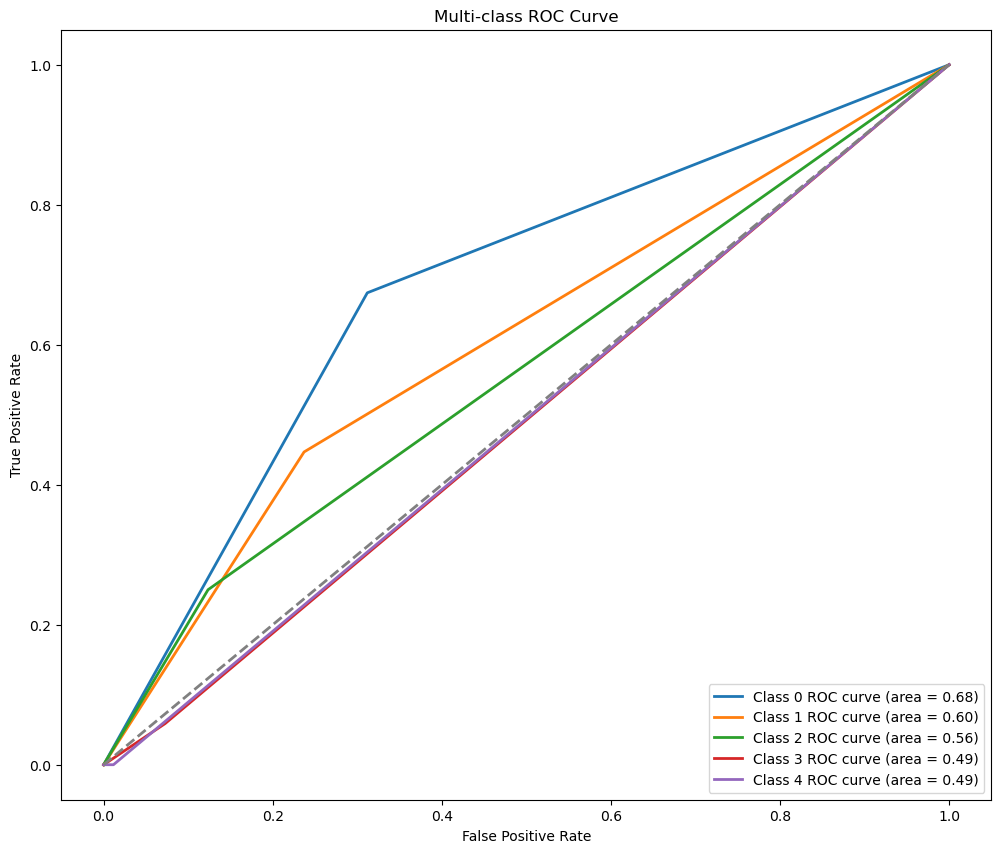

In [33]:
# Visualize the ROC curve.
# Binarize the output (convert y_test into one-hot for ROC)
y_test_bin = label_binarize(y_test, classes=dec_tree.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_pred_prob = dec_tree.predict_proba(x_test)

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class %d ROC curve (area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


## 5. Hyperparameter Tuning:

#### Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [34]:
# Create a Decision Tree Classifier
dec_tree= DecisionTreeClassifier(random_state=42)

#Define hyperparameter variable
param_grid = {
    'max_depth': [2,4,6,8,10,12],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

### Gridsearch
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

#get best parameter
best_param = grid_search.best_params_
print(best_param)

# Get the best estimator
dec_tree1 = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred_tune = dec_tree1.predict(x_test)
accuracyTune = accuracy_score(y_test, y_pred_tune)
print("-------------------------------------")
print("Accuracy on Testing Set:", accuracyTune)
print("-------------------------------------")

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
-------------------------------------
Accuracy on Testing Set: 0.5769230769230769
-------------------------------------


## 6. Model Evaluation and Analysis:

#### Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [35]:
#Performance metrics before tunning
print("----------------------------------------")
print("** Performance metrics before tunning **")
print("----------------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc_scr:.4f}")


print("\n----------------------------------------")
print("** Performance metrics after tunning **")
print("----------------------------------------")
#Performance metrics after tunning
accuracy_Tune = accuracy_score(y_test, y_pred_tune)
precision_Tune = precision_score(y_test, y_pred_tune, average='weighted', zero_division=0)
recall_Tune = recall_score(y_test, y_pred_tune, average='weighted', zero_division=0)
f1_Tune = f1_score(y_test, y_pred_tune, average='weighted', zero_division=0)

#ROC-AUC
y_pre_prob_Tune = dec_tree1.predict_proba(x_test)
roc_auc_Tune = roc_auc_score(y_test, y_pre_prob_Tune, multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy_Tune:.4f}")
print(f"Precision: {precision_Tune:.4f}")
print(f"Recall: {recall_Tune:.4f}")
print(f"F1-Score: {f1_Tune:.4f}")
print(f"ROC-AUC Score: {roc_auc_Tune:.4f}")

----------------------------------------
** Performance metrics before tunning **
----------------------------------------
Accuracy: 0.4780
Precision: 0.4612
Recall: 0.4780
F1-Score: 0.4688
ROC-AUC Score: 0.6217

----------------------------------------
** Performance metrics after tunning **
----------------------------------------
Accuracy: 0.5769
Precision: 0.4886
Recall: 0.5769
F1-Score: 0.5190
ROC-AUC Score: 0.7068


##### **Performance Analyse:**
- Acuuracy Score increased after hyperparameter tuning.
- Hyperparameter Tuning Results: 
    Using GridSearchCV, the optimal hyperparameters for the Decision Tree model were found to be:

    **{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}**.
  
- Cross-Validation Performance:
    The best model achieved a cross-validation accuracy score of 0.5592 during the grid search.

- Tuned Model Performance on Test Set:
    When evaluated on the test set, the Decision Tree model with optimized hyperparameters yielded the following metrics:
  
    - Accuracy: 0.5769

    - Precision: 0.4886

    - Recall: 0.5769

    - F1-Score: 0.5190

    - ROC-AUC Score: 0.7068
 


#### Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [36]:
#import plot tree library
from sklearn.tree import plot_tree

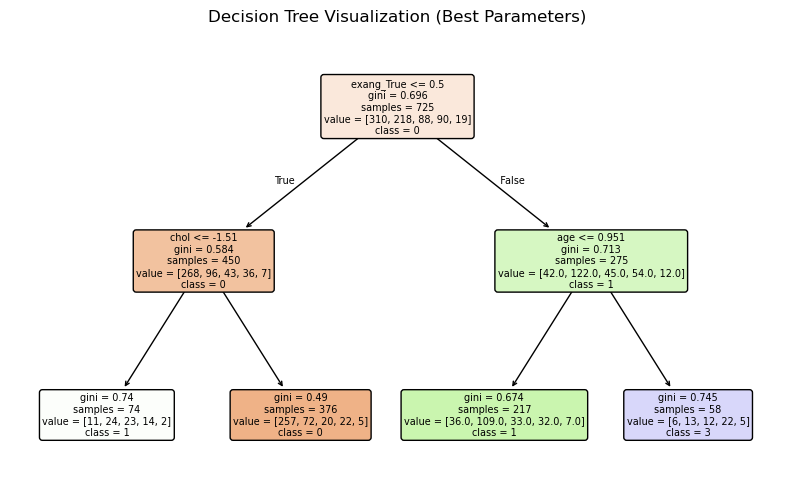

In [37]:
# Plot the tuned decision tree
plt.figure(figsize=(10,6))
plot_tree(dec_tree1, 
          feature_names=features.columns,   # replace with your feature names
          class_names=[str(cls) for cls in dec_tree1.classes_], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree Visualization (Best Parameters)")
plt.show()

##### Important Features: exang_True,chol and age

## Interview Questions:

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters include:
- **criterion (e.g., 'gini', 'entropy' for split quality):**
    - Defines how the quality of a split is measured
    - Effect:
      - gini - faster, often similar results.
      - entropy - uses information gain, can produce slightly different splits.
      - log_loss - probabilistic splits, useful for classification tasks.
  
- **max_depth (limits tree depth, controls overfitting):**
    - Maximum depth of the tree.
    - Effect:
        - Small depth - simpler tree, less overfitting, but risk of underfitting.
        - Large depth - more complex tree, captures details, but risk of overfitting.
      
- **min_samples_split (minimum samples required to split a node, controls overfitting):**
    - Minimum number of samples required to split a node.
    - Effect:
       - Higher values - fewer splits, simpler tree, less overfitting.
       - Lower values - more splits, complex tree, risk of overfitting.

- **min_samples_leaf (minimum samples in a leaf node, controls overfitting):**
    - Minimum number of samples required in a leaf node.
    - Effect:
        - Larger values → smoother decision boundaries, prevents tiny leaves.
        - Smaller values → more granular splits, risk of overfitting.

- **max_features (number of features to consider for best split, reduces variance):**
    - Number of features to consider when looking for the best split.
    - Options: "auto", "sqrt", "log2", or an integer/float.
    - Effect:
        - Restricting features reduces variance and speeds up training.
        - Using all features may increase accuracy but risk overfitting.

These hyperparameters allow you to tune the complexity of the tree, balancing between overfitting (too complex) and underfitting (too simple) the training data.



#### 2. What is the difference between Label Encoding and One-Hot Encoding?

- **Label Encoding:** Assigns a unique integer to each category (e.g., 'Red': 0, 'Green': 1, 'Blue': 2). It's suitable for ordinal categorical data where there's an inherent order, but it can introduce artificial ordinal relationships for nominal data, potentially misleading models.

- **One-Hot Encoding:** Creates new binary features (columns) for each category (e.g., Color_Red, Color_Green, Color_Blue). It's ideal for nominal categorical data (no inherent order) as it avoids introducing false relationships. Its disadvantage is that it increases dataset dimensionality.